[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisuex/Machine-Learning2025/blob/main/Lab12.ipynb)

In [23]:
# Install and import required libraries
!pip install gensim
!pip install -q gensim scikit-learn matplotlib seaborn
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Download the embeddings

In [24]:
import gensim.downloader as api

glove = api.load("glove-wiki-gigaword-100")


# Define 10 Semantic Pair Classes

In [25]:
semantic_classes = {
    "Gender": [
        ("king", "queen"),
        ("man", "woman"),
        ("actor", "actress"),
        ("husband", "wife"),
        ("prince", "princess"),
    ],
    "Past Tense": [
        ("go", "went"),
        ("eat", "ate"),
        ("see", "saw"),
        ("buy", "bought"),
        ("run", "ran"),
    ],
    "Singular/Plural": [
        ("cat", "cats"),
        ("dog", "dogs"),
        ("car", "cars"),
        ("child", "children"),
        ("mouse", "mice"),
    ],
    "Comparative": [
        ("good", "better"),
        ("fast", "faster"),
        ("small", "smaller"),
        ("young", "younger"),
        ("strong", "stronger"),
    ],
    "Superlative": [
        ("good", "best"),
        ("bad", "worst"),
        ("fast", "fastest"),
        ("strong", "strongest"),
        ("small", "smallest"),
    ],
    "Country/Capital": [
        ("france", "paris"),
        ("italy", "rome"),
        ("japan", "tokyo"),
        ("germany", "berlin"),
        ("egypt", "cairo"),
    ],
    "Tool/User": [
        ("hammer", "carpenter"),
        ("scalpel", "surgeon"),
        ("pen", "writer"),
        ("brush", "painter"),
        ("camera", "photographer"),
    ],
    "Currency/Country": [
        ("dollar", "usa"),
        ("euro", "germany"),
        ("yen", "japan"),
        ("rupee", "india"),
        ("pound", "uk"),
    ],
    "Opposites": [
        ("hot", "cold"),
        ("light", "dark"),
        ("happy", "sad"),
        ("big", "small"),
        ("up", "down"),
    ],
    "Job/Object": [
        ("chef", "knife"),
        ("teacher", "book"),
        ("painter", "canvas"),
        ("firefighter", "hose"),
        ("musician", "instrument"),
    ],
}


# Global PCA (Across All Words) in one common plot

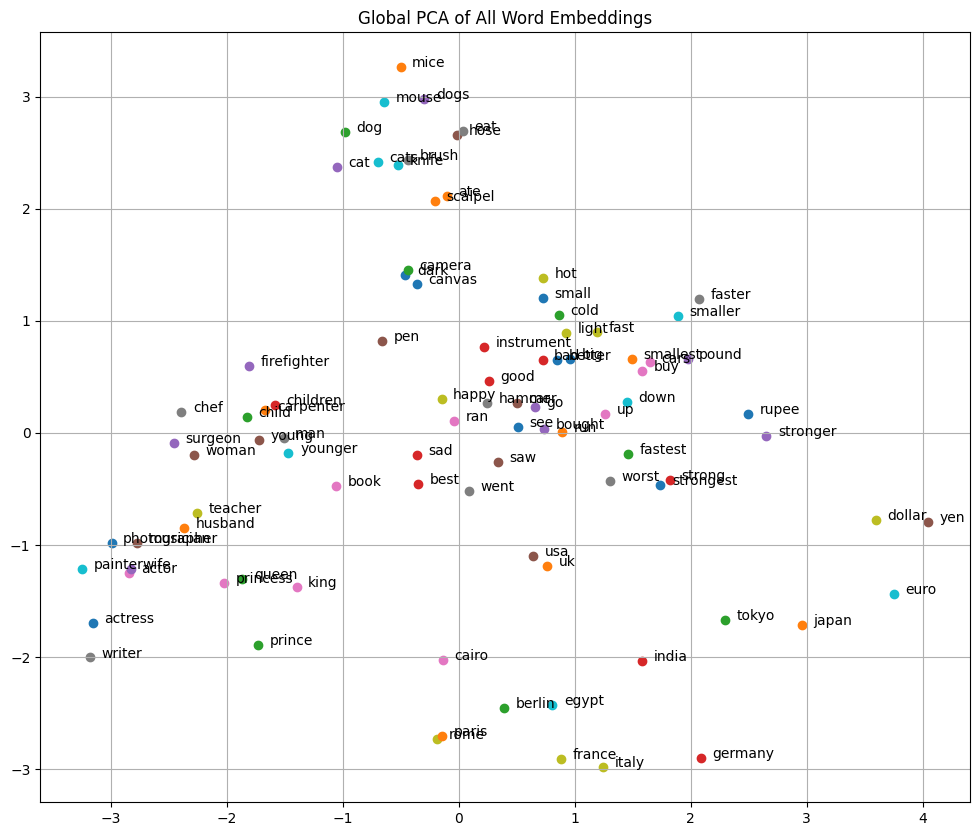

In [26]:
all_words = list(set(word for pairs in semantic_classes.values() for pair in pairs for word in pair))
vectors = np.array([glove[word] for word in all_words])
pca_global = PCA(n_components=2).fit_transform(vectors)

plt.figure(figsize=(12, 10))
for word, coord in zip(all_words, pca_global):
    plt.scatter(*coord, label=word)
    plt.text(coord[0]+0.1, coord[1], word)
plt.title("Global PCA of All Word Embeddings")
plt.grid(True)
plt.show()

In [27]:
# Global PCA (Across All Words) in class-plots

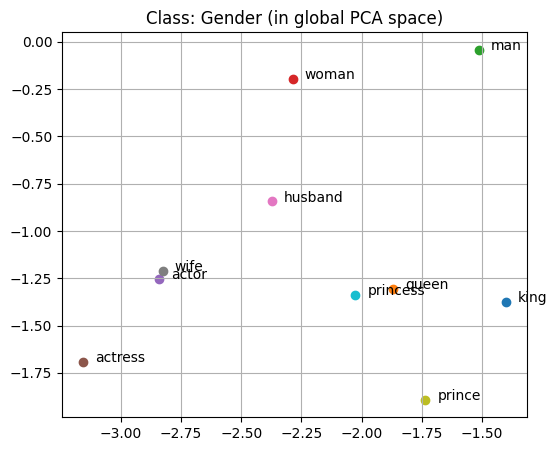

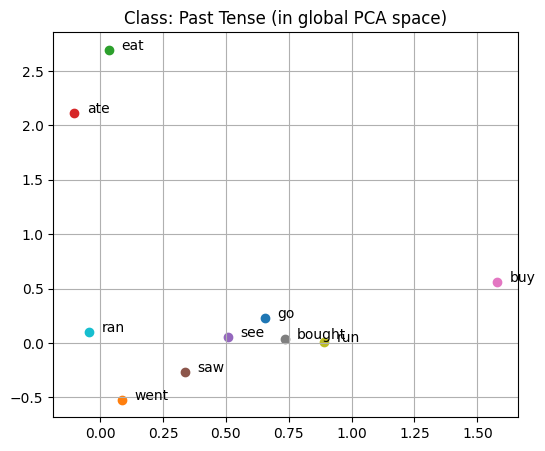

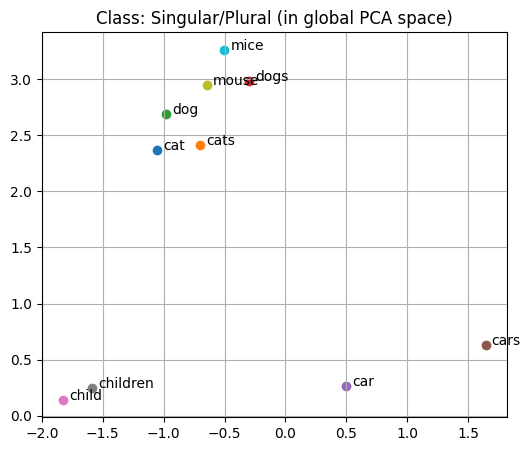

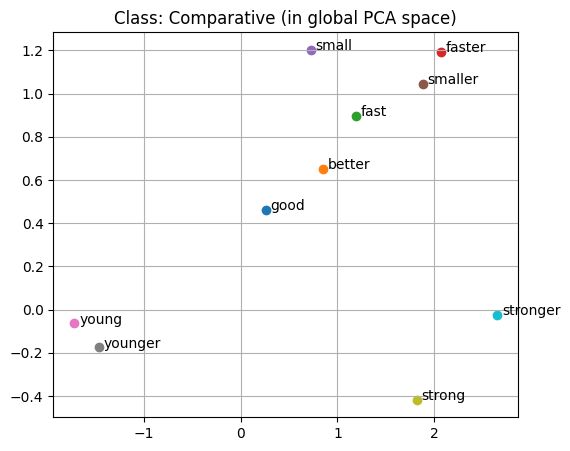

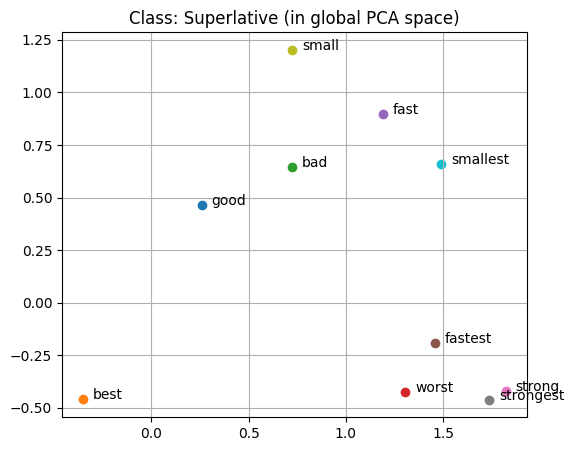

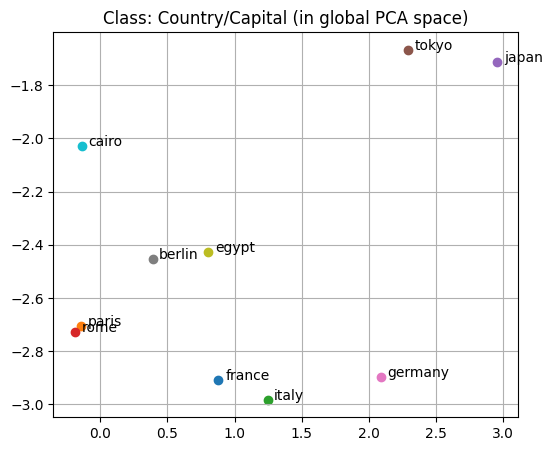

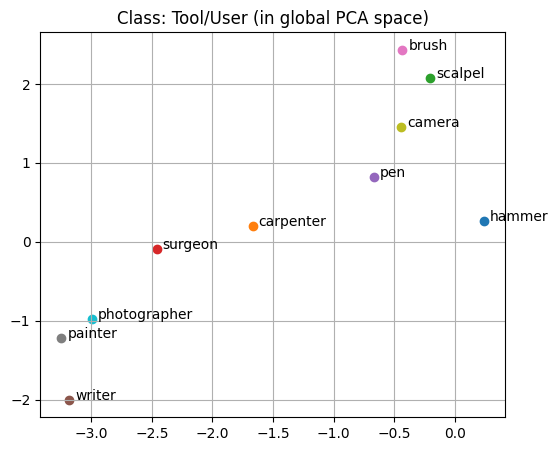

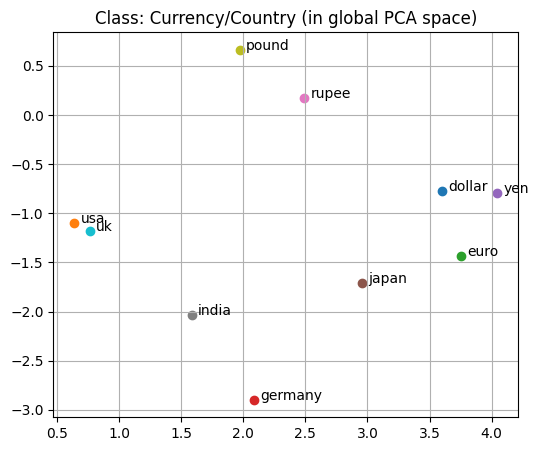

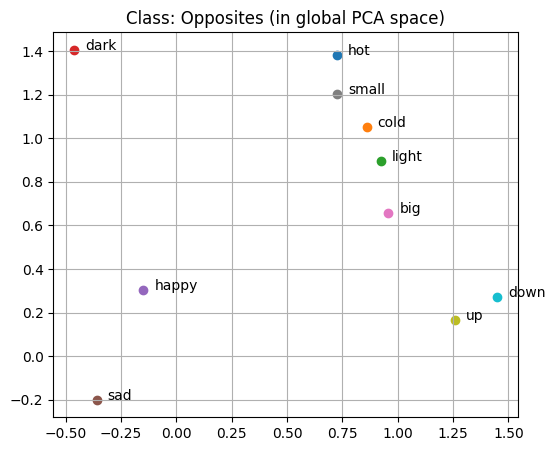

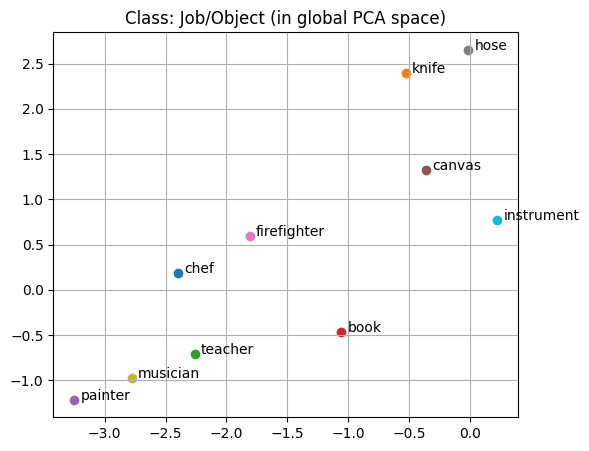

In [28]:
for class_name, pairs in semantic_classes.items():
    class_words = [word for pair in pairs for word in pair]
    coords = [pca_global[all_words.index(word)] for word in class_words]
    coords = np.array(coords)
    
    plt.figure(figsize=(6, 5))
    for word, coord in zip(class_words, coords):
        plt.scatter(*coord)
        plt.text(coord[0]+0.05, coord[1], word)
    plt.title(f"Class: {class_name} (in global PCA space)")
    plt.grid(True)
    plt.show()

# Local PCA (Per Class)

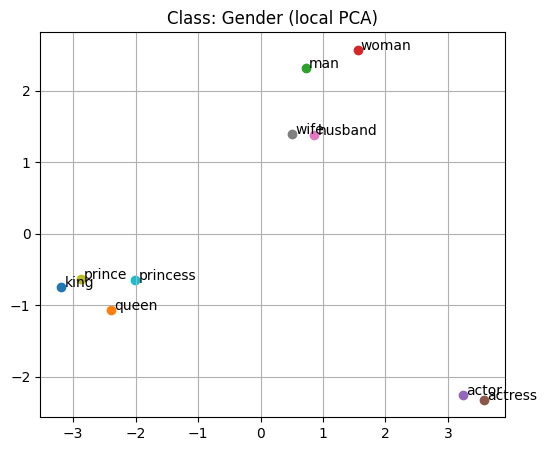

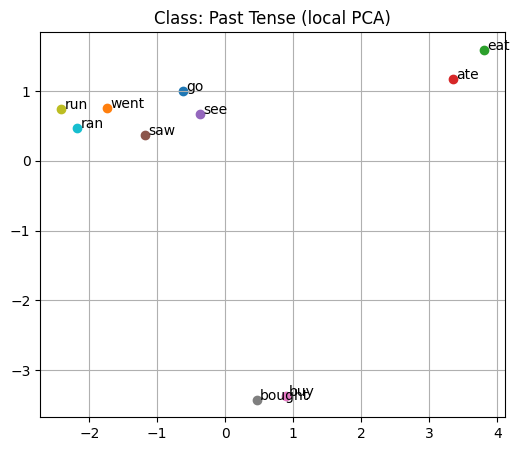

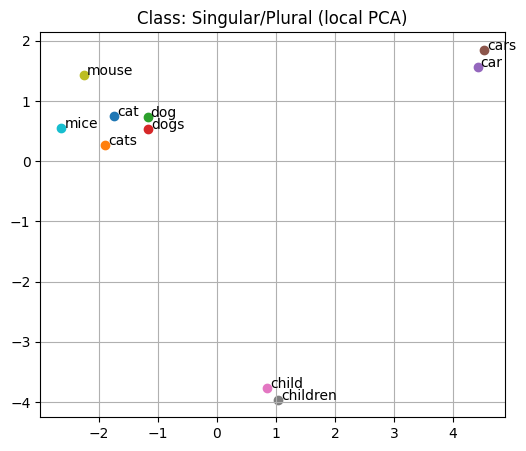

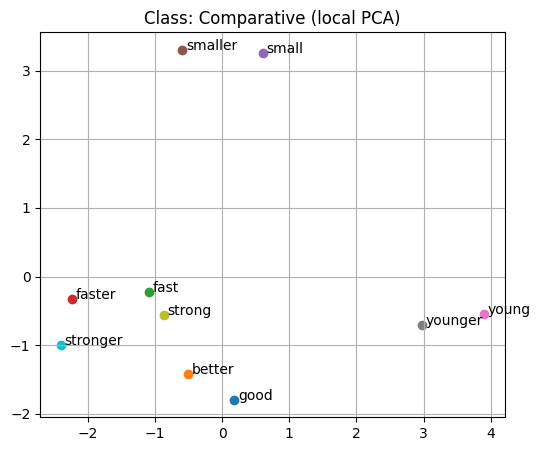

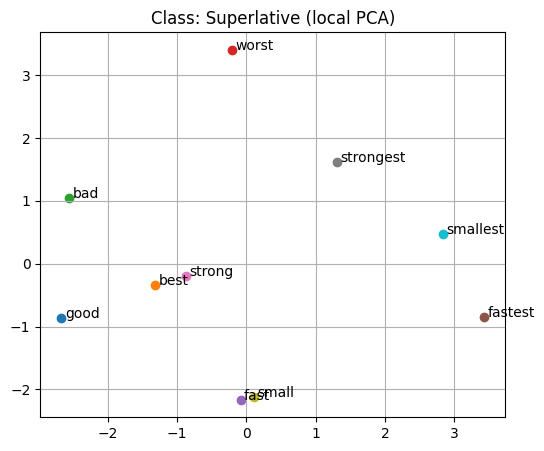

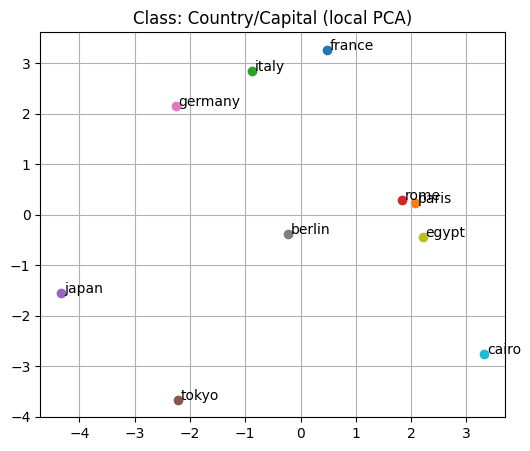

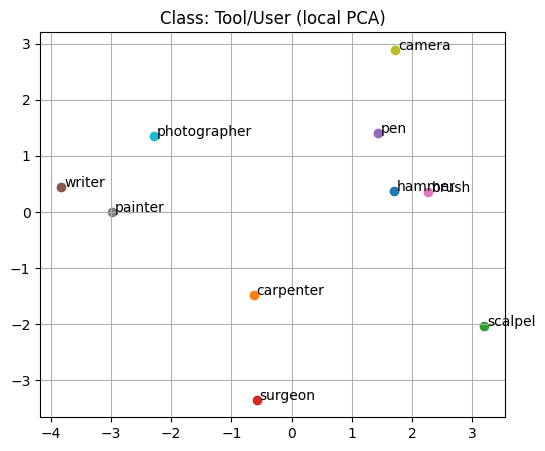

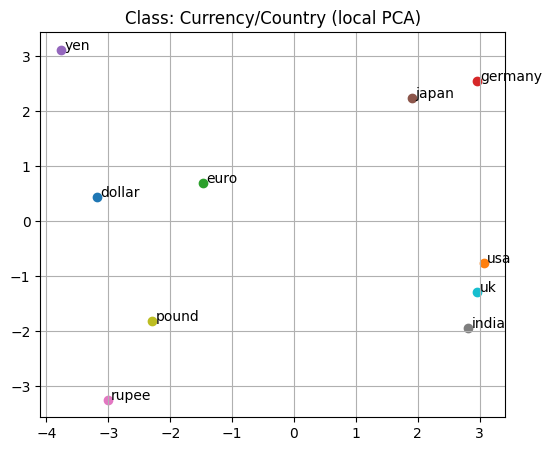

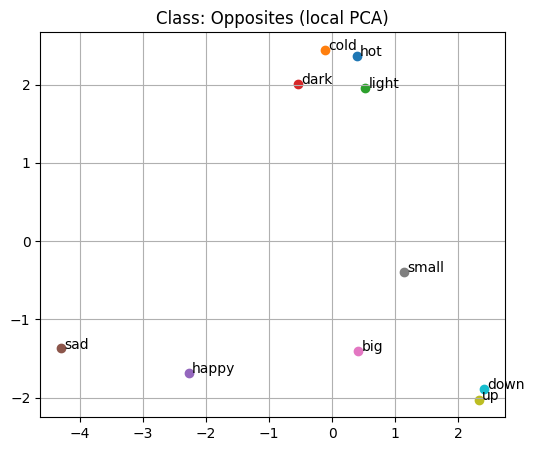

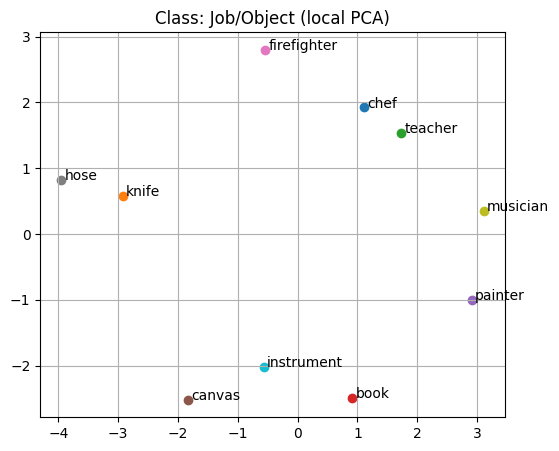

In [29]:
for class_name, pairs in semantic_classes.items():
    class_words = [word for pair in pairs for word in pair]
    vectors = np.array([glove[word] for word in class_words])
    pca = PCA(n_components=2).fit_transform(vectors)
    
    plt.figure(figsize=(6, 5))
    for word, coord in zip(class_words, pca):
        plt.scatter(*coord)
        plt.text(coord[0]+0.05, coord[1], word)
    plt.title(f"Class: {class_name} (local PCA)")
    plt.grid(True)
    plt.show()

# Embedding Arithmetic (using cosine similarity)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

def find_closest_words(vec, top_n=5):
    all_keys = list(glove.key_to_index.keys())
    all_vecs = np.array([glove[word] for word in all_keys])
    sims = cosine_similarity(vec.reshape(1, -1), all_vecs)[0]
    best_indices = sims.argsort()[-top_n:][::-1]
    return [(all_keys[i], sims[i]) for i in best_indices]

print("\nEmbedding Arithmetic Results:")
for class_name, pairs in semantic_classes.items():
    A, B = pairs[0]  # Take first pair
    try:
        vec = glove[B] - glove[A] + glove[pairs[1][0]]
        closest = find_closest_words(vec, top_n=5)
        print(f"\n{class_name}:")
        print(f"  {B} - {A} + {pairs[1][0]} ≈ ?")
        for word, score in closest:
            print(f"    {word} (score: {score:.4f})")
    except KeyError as e:
        print(f"Skipping {class_name} due to missing word: {e}")


Embedding Arithmetic Results:

Gender:
  queen - king + man ≈ ?
    woman (score: 0.8040)
    man (score: 0.7791)
    girl (score: 0.7349)
    she (score: 0.6818)
    her (score: 0.6592)

Past Tense:
  went - go + eat ≈ ?
    ate (score: 0.8671)
    eat (score: 0.8156)
    eaten (score: 0.7939)
    eating (score: 0.7511)
    drank (score: 0.6431)

Singular/Plural:
  cats - cat + dog ≈ ?
    dogs (score: 0.8922)
    cats (score: 0.8814)
    dog (score: 0.7874)
    animals (score: 0.7513)
    pets (score: 0.7392)

Comparative:
  better - good + fast ≈ ?
    fast (score: 0.8982)
    faster (score: 0.8190)
    slower (score: 0.7297)
    slow (score: 0.7258)
    pace (score: 0.6869)

Superlative:
  best - good + bad ≈ ?
    bad (score: 0.7930)
    best (score: 0.7674)
    worst (score: 0.6936)
    movie (score: 0.6629)
    big (score: 0.6526)

Country/Capital:
  paris - france + italy ≈ ?
    rome (score: 0.8084)
    milan (score: 0.7317)
    italy (score: 0.7273)
    naples (score: 0.7090